<a href="https://colab.research.google.com/github/SupreethRao99/dm_pix/blob/master/examples/image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIX
PIX is an image processing library in JAX, for JAX.

## overview
JAX is a library resulting from the union of Autograd and XLA for high-performance machine learning research. It provides NumPy, SciPy, automatic differentiation and first class GPU/TPU support.

PIX is a library built on top of JAX with the goal of providing image processing functions and tools to JAX in a way that they can be optimized and parallelised through `jax.jit()`, `jax.vmap()`, `jax.pmap()`

In [ ]:
%%capture
!pip install dm-pix
!git clone https://github.com/deepmind/dm_pix.git

In [ ]:
import dm_pix as pix
import jax.numpy as jnp
import numpy as np
import PIL.Image as pil
from jax import random

In [ ]:
IMAGE_PATH = '/content/dm_pix/examples/assets/jax_logo.jpg'

In [ ]:
# Helper functions to read images and display them

def get_image(img_path) -> jnp.ndarray:
  return jnp.array(pil.open(img_path), dtype=jnp.float32) / 255.


def imshow(image: jnp.ndarray) -> None:
  """Shows the input image using PIL/Pillow backend."""
  image = pil.fromarray(np.asarray(image * 255.).astype(np.uint8), "RGB")
  display(image)

# adjust_brightness
Shifts the brightness of an RGB image by a given amount

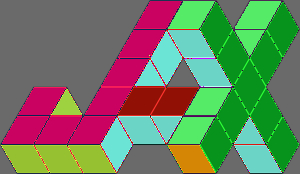

In [ ]:
image = get_image(IMAGE_PATH)
delta = 0.42 #@param {type: "slider", min: 0, max: 1}
new_image = pix.adjust_brightness(
    image=image, 
    delta=delta)
imshow(new_image)

# adjust_contrast
Adjusts the contrast of an RGB image by a given multiplicative amount.

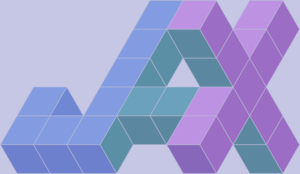

In [ ]:
image = get_image(IMAGE_PATH)
factor = 0.42 #@param {type: "slider", min: 0, max: 1}
new_image = pix.adjust_contrast(
    image=image, 
    factor=factor)
imshow(new_image)

# adjust_gamma
Adjusts the gamma of an RGB image

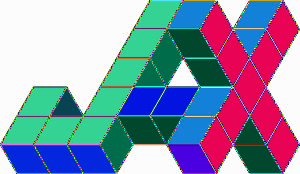

In [ ]:
image = get_image(IMAGE_PATH)
gamma = 3 #@param {type: "slider", min: 0, max: 10}
gain = 4 #@param{type: "slider",min:0, max:10}
new_image = pix.adjust_gamma(
    image=image,
    gain=gain, 
    gamma=gamma)
imshow(new_image)

# adjust_hue
Adjust the hue of an RGB image by a given multiplicative amount

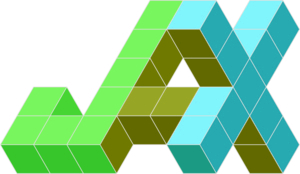

In [ ]:
image = get_image(IMAGE_PATH)
delta = 0.7 #@param {type: "slider", min: 0, max: 1}
new_image = pix.adjust_hue(
    image=image, 
    delta=delta)
imshow(new_image)

# adjust_saturation
Adjusts the saturation of an RGB image by a given multiplicative amount

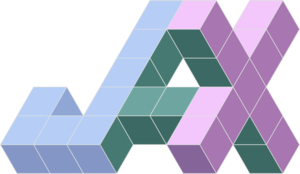

In [ ]:
image = get_image(IMAGE_PATH)
factor = 0.42 #@param {type: "slider", min: 0, max: 1}
new_image = pix.adjust_saturation(
    image=image, 
    factor=factor)
imshow(new_image)

# flip_left_right
Flips an image along the horizontal axis. 
Assumes that the image is either ...HWC or ...CHW and flips the W axis

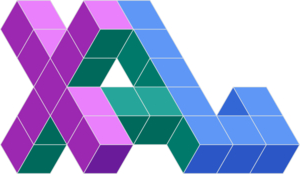

In [ ]:
image = get_image(IMAGE_PATH)
new_image = pix.flip_left_right(
    image=image)
imshow(new_image)

# flip_up_down
Flips an image along the vertical axis. 
Assumes that the image is either ...HWC or ...CHW and flips the H axis

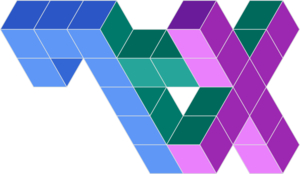

In [ ]:
image = get_image(IMAGE_PATH)
new_image = pix.flip_up_down(
    image=image)
imshow(new_image)

#gaussian_blur

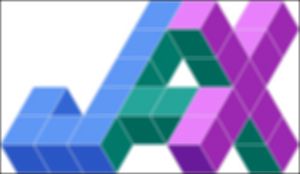

In [ ]:
image = get_image(IMAGE_PATH)
sigma = 5 #@param {type: "slider", min: 0, max: 10}
kernel_size = 5 #@param{type: "slider",min:0, max:10}
new_image = pix.gaussian_blur(
    image=image,
    sigma=sigma, 
    kernel_size=kernel_size)
imshow(new_image)

#random_brightness
adjust_brightness(...) with random delta in [-max_delta, max_delta]

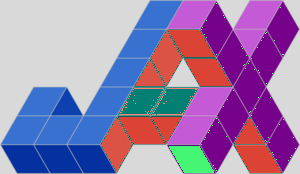

In [ ]:
key = random.PRNGKey(0) # change to see different brightness
image = get_image(IMAGE_PATH)
delta = 0.9
new_image = pix.random_brightness(
    key=key,
    image=image, 
    max_delta=delta)
imshow(new_image)

#random_contrast
adjust_contrast(...) with random factor in [lower, upper).

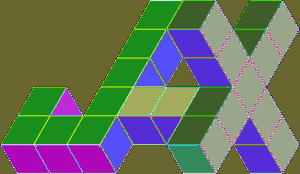

In [ ]:
key = random.PRNGKey(0) # change to see different contrast
image = get_image(IMAGE_PATH)
new_image = pix.random_contrast(
    key=key,
    image=image, 
    lower=0,
    upper=5)
imshow(new_image)

# random_crop
Crop images randomly to specified sizes.

Given an input image, it crops the image to the specified _crop_sizes_. If _crop_sizes_ are lesser than the image's size, the offset for cropping is chosen at random

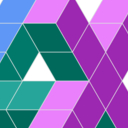

In [ ]:
key = random.PRNGKey(5) #change to see different crop
image = get_image(IMAGE_PATH)
new_image = pix.random_crop(
    key=key,
    image=image, 
    crop_sizes=(128,128,3))
imshow(new_image)

#random_flip_left_right
50% chance of _flip_up_down(...)_ otherwise returns image unchanged.

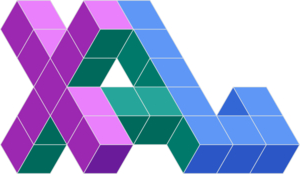

In [ ]:
key = random.PRNGKey(1) #change to see different views
image = get_image(IMAGE_PATH)
new_image = pix.random_flip_left_right(
    key=key,
    image=image
    )
imshow(new_image)

#random_flip_up_down
50% chance of _flip_up_down(...)_ otherwise returns image unchanged.

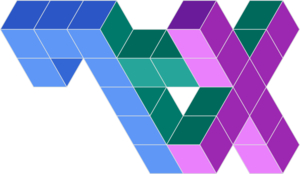

In [ ]:
key = random.PRNGKey(0) #change to see different views
image = get_image(IMAGE_PATH)
new_image = pix.random_flip_up_down(
    key=key,
    image=image
    )
imshow(new_image)

#random_hue
_adjust_hue(...)_ with random delta in [-max_delta, max_delta).

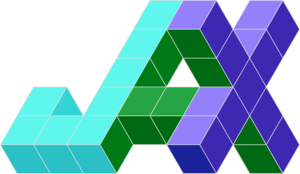

In [ ]:
key = random.PRNGKey(0) #change to see different views
image = get_image(IMAGE_PATH)
delta = 0.7
new_image = pix.random_hue(
    key=key,
    image=image, 
    max_delta=delta)
imshow(new_image)

#random_saturation
_adjust_saturation(...)_ with random factor in [lower, upper)

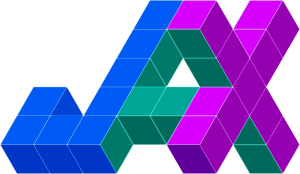

In [ ]:
key = random.PRNGKey(0) # change to see different saturation
image = get_image(IMAGE_PATH)
new_image = pix.random_saturation(
    key=key,
    image=image, 
    lower=0,
    upper=5)
imshow(new_image)

#rot90
Rotate an image counter-clockwise by 90 degrees.
Assumes that the image is either ...HWC or ...CHW

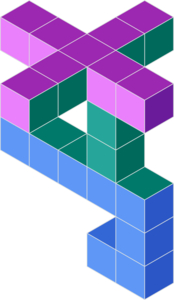

In [ ]:
image = get_image(IMAGE_PATH)
new_image = pix.rot90(
    k=1,#number of times the rotation is applied
    image=image)
imshow(new_image)

#solarize
Applies solarization to an image.
All values above a given threshold will be inverted

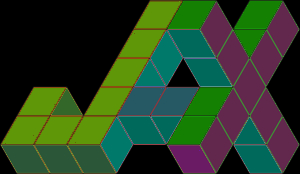

In [ ]:
image = get_image(IMAGE_PATH)
new_image = pix.solarize(
    threshold=0.6,
    image=image)
imshow(new_image)